## Data Cleaning, Pre-processing on Tripavisor hotel reviews

In [1]:
# concatenate the two datasets
import pandas as pd
import seaborn as sns

In [2]:
df_1 = pd.read_csv('five_hotels.csv')

In [3]:
df_2 = pd.read_csv('last_hotels.csv')

In [4]:
# concat dfs
df = pd.concat([df_1, df_2])


In [5]:
# reseting index
df = df.reset_index(drop=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25050 entries, 0 to 25049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviews        25050 non-null  object
 1   review_rating  25050 non-null  int64 
 2   user           25050 non-null  object
dtypes: int64(1), object(2)
memory usage: 587.2+ KB


In [7]:
# checking for null values
df.isna().sum()

reviews          0
review_rating    0
user             0
dtype: int64

In [8]:
# checking for duplicates 
df.nunique()

reviews          25049
review_rating        5
user             22205
dtype: int64

- The df has one duplicated review and a few users that have more than one review

In [12]:
# create a feature with the names of hotels
 #NOTE : not sure of I will use this.
names_hotel = pd.Series(['Park_Lane', 'Hilton_Garden_Inn', 'Hudson' , 'Wellington', 'Wellington_Hotel2' , 'Novotel', 'Stewart', 'Sofitel', 'Arthouse' , 'Park_Central_Hotel'])

repeat_names_hotel = names_hotel.repeat(2505).reset_index()

df['hotel_name'] = repeat_names_hotel.drop(columns='index')

# convert hotel_names into categoris for memory optimization
df['hotel_name'] = df['hotel_name'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25050 entries, 0 to 25049
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   reviews        25050 non-null  object  
 1   review_rating  25050 non-null  int64   
 2   user           25050 non-null  object  
 3   hotel_name     25050 non-null  category
dtypes: category(1), int64(1), object(2)
memory usage: 612.1+ KB


# EDA

### Inspecting the hotel raings

In [9]:
# remove zero from review_rating
df['review_rating'] = df['review_rating'].apply(lambda x : x // 10)

In [10]:
df['review_rating'].value_counts()

5    11878
4     6622
3     3074
1     1741
2     1735
Name: review_rating, dtype: int64

In [11]:
# df['review_rating'].plot.hist()
# plot.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

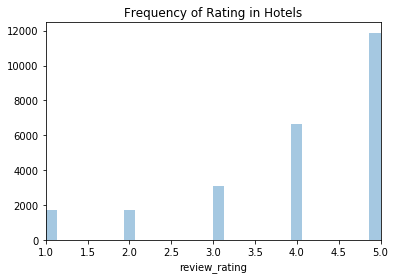

In [14]:
# plot distrivution of ratings
plot = sns.distplot(df['review_rating'] ,kde=False).set(xlim=(1,5))
# .set_title('Frequency of Ratings in Hotels')
# tips = sns.load_dataset("tips")
# sns.set_style("whitegrid")
# g = sns.lmplot(x="tip", y="total_bill", data=tips,
#  aspect=2)
# g = (plot.set_axis_labels("Tip","Total bill(USD)").
# set(xlim=(0,15),ylim=(0,100)))
plt.title("Frequency of Rating in Hotels")
plt.show()


In [15]:
df['review_rating'].describe()

count    25050.000000
mean         4.004431
std          1.224533
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: review_rating, dtype: float64

- Most of the reviews have possitive reviews according to the ratings. Not many hotels have negative reviews. The average of the rating reviews are 4.

### Inspencting users 

In [16]:
df['user'].value_counts()

Mark C        13
Lisa H        12
John B        12
David B       11
Michelle M    11
              ..
MarixuRPM      1
Nailah N       1
ljbayer        1
Irene M        1
sweer73        1
Name: user, Length: 22205, dtype: int64

In [17]:
df['user'].value_counts().describe()

count    22205.000000
mean         1.128124
std          0.557393
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: user, dtype: float64

- There are 22205 unique reviews in the dataframe which is quite diverse. The average user has contributed about 1 review to the dataframe. The top reviews (Marck C) has contributed 13 reviews.

### Inspecting reciews

In [ ]:
# create a new feature for the lenght of the review

In [18]:
df['reviews_len'] = df['reviews'].apply(lambda x : len(x))
#df['reviews'].str.len()

In [27]:
df['reviews_len'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
25045    False
25046    False
25047    False
25048    False
25049    False
Name: reviews_len, Length: 25050, dtype: bool

In [29]:
print('mean:', df.reviews_len.mean())
print('std:', df.reviews_len.std())
print('max:', df.reviews_len.max())
print('min:', df.reviews_len.min())

mean: 469.3043113772455
std: 219.0262215747896
max: 2535
min: 195


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Data')

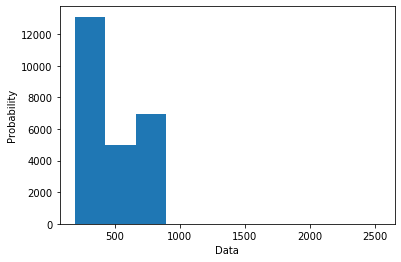

In [22]:
plt.hist(df['reviews_len'])  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

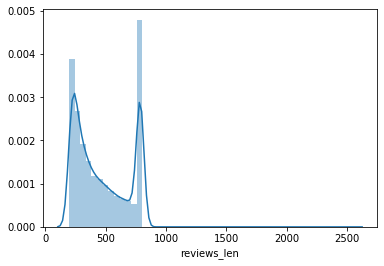

In [23]:
sns.distplot(df['reviews_len'])


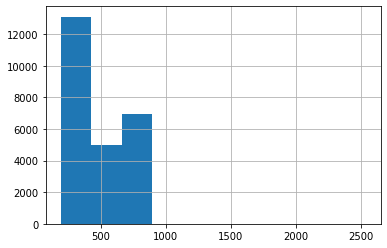

In [32]:
df['reviews_len'].hist()


In [ ]:
# data claning
# look for duplicates 
# look for null
# replace the null with the mean
# look for outlayers
# optimatization de la memoria

In [30]:
# convertir str to numbers 
#visulaiation of the most expesive hotels in NYC
df.isna().sum()


reviews          0
review_rating    0
user             0
hotel_name       0
dtype: int64

In [17]:
df_hotels.nunique()

hotel_names      810
prices           227
total_reviews    514
url              627
ratings            9
dtype: int64

In [18]:
df_hotels['ratings'].unique()

array(['3.5 of 5 bubbles', '4 of 5 bubbles', '4.5 of 5 bubbles',
       '3 of 5 bubbles', '5 of 5 bubbles', '2.5 of 5 bubbles',
       '2 of 5 bubbles', '1.5 of 5 bubbles', '1 of 5 bubbles', nan],
      dtype=object)

In [ ]:
# use this 
df['Fare'].fillna(df['Fare'].median())


In [ ]:
#duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

In [ ]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

In [ ]:
"""data preprocesing revies
1--> remove puntuation
2--> lower
3--> remove $%^&
4__> remove stop wrods like hotel , hotels . nyc, 



"""